In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

from skimage.feature import hog
from skimage import data as skim_data 
from skimage import color, exposure
from sklearn.decomposition import PCA

###########################################

import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

###########################################

# Imports
import numpy as np
import tensorflow as tf
import csv

######################################
from skimage import data, io, color, exposure
from skimage.transform import resize, rescale, rotate, setup, warp, AffineTransform

In [6]:
im_inds = []
im_names = []
im_prices = []
with open('../datasets/bikes_filtered.csv', 'r') as f:
        datareader = csv.reader(f)
        for line in datareader:
            im_inds.append(line[0])
            im_names.append(line[1])
            im_prices.append(line[2])
            
images = []

In [ ]:


for i in range(0, len(im_inds)):
    #print(i)
    im_ind = im_inds[i]
    image_file = '../datasets/bikes_im/' + str(im_ind) + '.jpg'
    curr_im = color.rgb2gray(imread(image_file))
    resized_im = resize(curr_im, (224,224))
    images.append(resized_im)
    
    if i % 1000 == 0:
        print(i)
    
#reize 224x224

#images.append(color.rgb2gray(skim_data.astronaut()))
#images.append(color.rgb2gray(skim_data.camera()))

hog_array = np.zeros((len(images), 224*224))
print("hogarray")
print(hog_array)

for i, image in enumerate(images):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(32, 32),
                        cells_per_block=(1, 1), visualise=True, block_norm='L2-Hys')
    flattened_len = int(hog_image.shape[0]) * int(hog_image.shape[1])
    pixels = np.reshape(hog_image, (-1, flattened_len))
    hog_array[i, :] = pixels
    
    if i % 1000 == 0:
        print(i)

pca = PCA(n_components=2)
pca.fit(hog_array)
hog_images_compressed = pca.transform(hog_array)
print("hog_images_compressed")
print(hog_images_compressed)
#flatten



In [ ]:
pca = PCA(n_components=200)
pca.fit(hog_array)
hog_images_compressed = pca.transform(hog_array)

In [ ]:
print(hog_images_compressed.shape)
print(pca.components_.shape)

In [ ]:
np.save("hog_images_compressed", hog_images_compressed)
np.save("pca_components", pca.components_)

In [9]:
# Load training and eval data
hog_images_compressed = np.load("hog_images_compressed.npy")
pca_components_ = np.load("pca_components.npy")
train_data = hog_images_compressed
im_prices_int = []
for i in im_prices:
    im_prices_int.append(int(i))
train_labels = im_prices_int


regr = linear_model.LinearRegression()

regr.fit(train_data, train_labels)

label_pred = regr.predict(train_data)

for a,b in zip(train_labels, label_pred):
    print(a,b)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(label_pred, train_labels))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(train_labels, label_pred))

Coefficients: 
 [  1.29794125e+03  -2.01779110e+03   5.74803155e+02   8.15958123e+02
   7.66170572e+02   1.62928340e+03   1.95924334e+03   4.43651196e+03
  -4.18825413e+03   4.66595761e+03  -9.89626066e+02  -2.07047582e+03
   4.17181129e+03  -2.53965544e+03   3.11003377e+03  -1.61391971e+03
  -3.39060359e+02   3.64501417e+03   3.44229932e+02   2.96790431e+03
  -1.32882603e+03   2.48665422e+03   3.28933370e+03  -1.36871805e+03
   5.53621521e+03  -1.11996856e+03  -1.49986361e+03  -5.44163093e+02
  -8.78571611e+02  -2.95731782e+03  -3.37539258e+02  -2.76124530e+03
  -1.27702641e+03  -5.49959927e+01   4.45859075e+03  -1.03766074e+03
   1.88849521e+02  -1.80512227e+03  -8.91138262e+02   4.04075495e+03
   1.76988685e+03  -1.35727625e+03  -2.52441100e+03  -2.48631681e+03
   9.75168550e+02   1.48142192e+03   5.05105303e+03  -2.71420753e+03
  -6.64742374e+02  -2.34504451e+03   1.63882391e+03  -1.93294149e+03
   7.46419401e+02  -2.32615615e+03   2.28651860e+03  -1.15619142e+03
  -2.32937170e+03 

Mean squared error: 1615704.96
Variance score: 0.50

In [24]:
error = []
for a,b in zip(train_labels, label_pred):
    error.append((np.absolute(a-b),a,b))
error.sort(key=lambda x: x[0])

error_x = range(len(error))
error_val = []
error_y_label = []
error_y_pred = []
for e in error:
    error_val.append(e[0])
    error_y_label.append(e[1])
    error_y_pred.append(e[2])

Text(0,0.5,'Error')

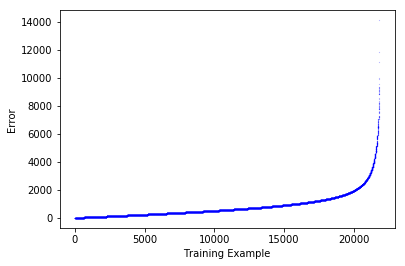

In [28]:
plt.scatter(error_x, error_val,  color='blue', s=0.01)
plt.xlabel('Training Example')
plt.ylabel('Error')